<a href="https://colab.research.google.com/github/Mejdii/HackMed/blob/main/Predict%20The%20Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
dataset=pd.read_excel("/content/Patient_dataset (2).xlsx")
dataset.head()

,Patient ID,Forename,Surname,Date of Birth,Sex,Past medical history,Medications,Sodium,Potassium,Urea,Creatinine,bicarbonate,chloride,Haemoglobin,Mean cell count,Platelets,WBC,Neutrophils,Lymphocytes,Eosinophils,Disease,Patient notes entry - 24/04/21
0,XY123,Joe,Bloggs,1997-10-17,M,"Polycystic Kidney disease , Hypertension,",rampril - 10mg OD\nBiosprolol - 12mg BD,134,4.5,5.0,80,26,95,137,92,200,6*10^9,3*10^9,3*10^9,0.3*10^9,Subarachnoid haemorrhage,Patient presented to the emergency department ...
1,XY124,Herbert,Garraway,1975-05-16,M,Hypertension,Sertaline - 15mg BD\nBiosprolol - 12mg BD\nlos...,140,3.0,5.0,80,24,85,138,85,200,5*10^9,4*10^9,2*10^9,0.3*10^9,Irritable bowel syndrome,Patient describes that He is feeling unwell an...
2,XY125,Aubrey,Stephenson,1984-06-14,F,SLE,rampril - 10mg OD\nBiosprolol - 12mg BD,200,4.0,7.1,60,30,100,120,90,100,15*10^9,5*10^9,3.5*10^9,0.6*10^9,Acute kidney failure,Patient is generally unwell with myalgia and f...
3,XY126,Wenzel,Friedmann,1990-05-20,M,Type 1 Diabetes,Sertaline - 15mg BD\nBiosprolol - 12mg BD\nlos...,130,6.0,4.0,65,20,80,135,80,190,11*10^9,7*10^9,3*10^9,0.4*10^9,Hypoglycaemia,"Patient presented with shaking, sweating and n..."
4,XY127,Mary,Eaker,2000-10-12,F,Iron deifiency anemia,rampril - 10mg OD\nBiosprolol - 12mg BD,130,4.0,6.0,70,22,97,42,50,105,4*10^9,4*10^9,2.5*10^9,0.2*10^9,Hypothyroidism,Patient found drowsy and confused on the stree...


In [48]:
df=dataset[dataset.columns[4:21]]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Sex,Sodium,Potassium,Urea,Creatinine,bicarbonate,chloride,Haemoglobin,Mean cell count,Platelets,Disease
0,M,134,4.5,5.0,80,26,95,137,92,200,Subarachnoid haemorrhage
1,M,140,3.0,5.0,80,24,85,138,85,200,Irritable bowel syndrome
2,F,200,4.0,7.1,60,30,100,120,90,100,Acute kidney failure
3,M,130,6.0,4.0,65,20,80,135,80,190,Hypoglycaemia
4,F,130,4.0,6.0,70,22,97,42,50,105,Hypothyroidism


In [6]:
df.describe()

,Sodium,Potassium,Urea,Creatinine,bicarbonate,chloride,Haemoglobin,Mean cell count,Platelets
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,134.333333,3.722222,7.455556,75.777778,27.888889,91.555556,123.555556,83.555556,163.333333
std,27.092434,1.121135,4.875221,13.645309,5.206833,7.019813,31.241443,13.830321,46.569840
min,100.000000,2.000000,4.000000,60.000000,20.000000,80.000000,42.000000,50.000000,100.000000
25%,125.000000,3.000000,5.000000,65.000000,24.000000,86.000000,130.000000,80.000000,105.000000
50%,130.000000,3.500000,6.000000,70.000000,30.000000,91.000000,135.000000,85.000000,190.000000
75%,134.000000,4.000000,7.100000,80.000000,30.000000,97.000000,138.000000,92.000000,200.000000
max,200.000000,6.000000,20.000000,100.000000,35.000000,100.000000,140.000000,95.000000,200.000000


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split


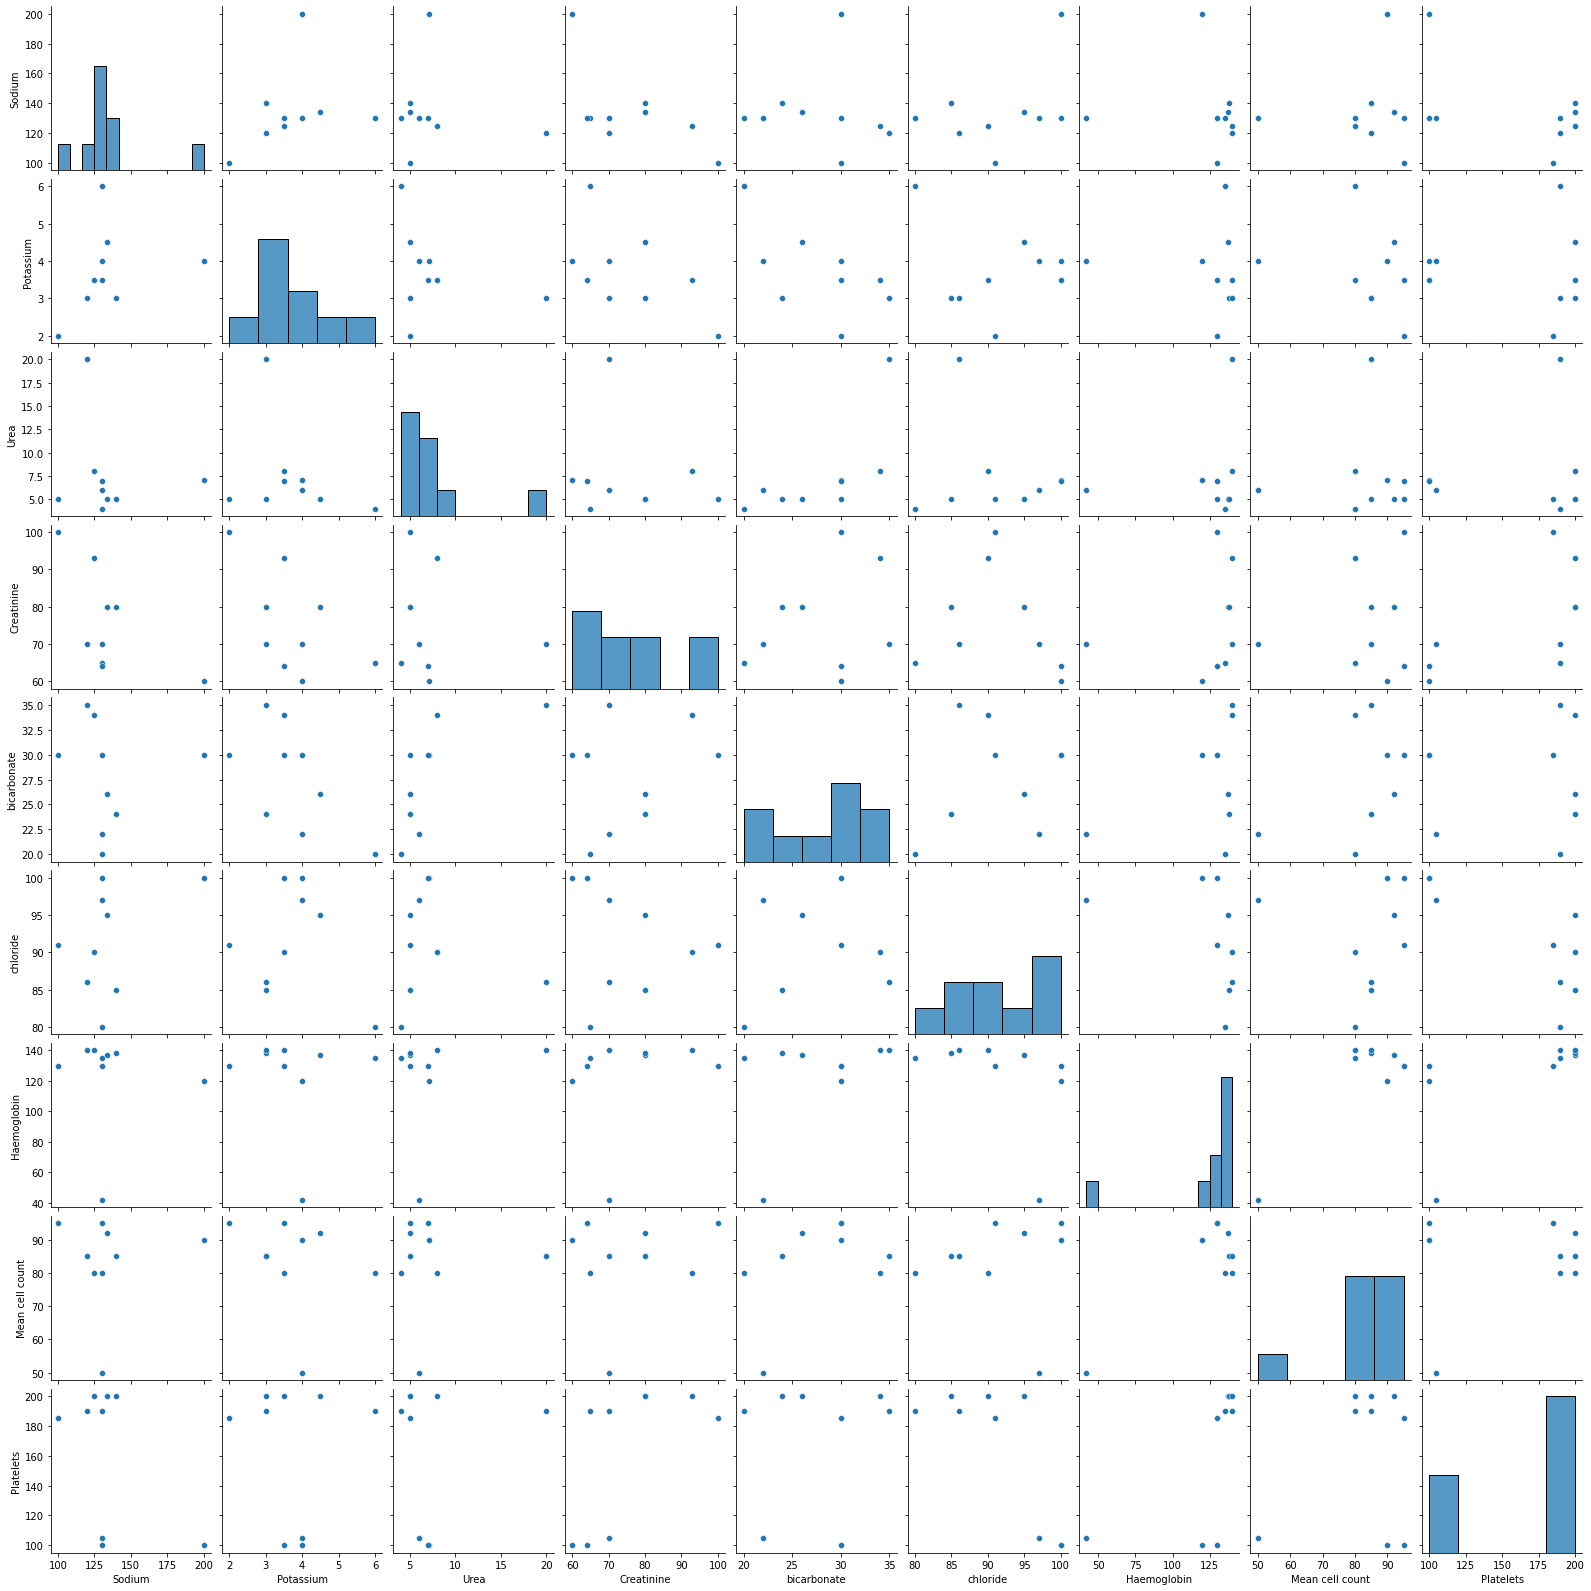

In [10]:
sns.pairplot(df)

In [49]:
# pre-process the data
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df["Sex"]=lb.fit_transform(df["Sex"])
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Sex,Sodium,Potassium,Urea,Creatinine,bicarbonate,chloride,Haemoglobin,Mean cell count,Platelets,Disease
0,1,134,4.5,5.0,80,26,95,137,92,200,Subarachnoid haemorrhage
1,1,140,3.0,5.0,80,24,85,138,85,200,Irritable bowel syndrome
2,0,200,4.0,7.1,60,30,100,120,90,100,Acute kidney failure
3,1,130,6.0,4.0,65,20,80,135,80,190,Hypoglycaemia
4,0,130,4.0,6.0,70,22,97,42,50,105,Hypothyroidism


In [50]:
y=df['Disease']
x=df.drop("Disease", axis=1)
# Split dataset into training set and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [51]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [62]:
x_test.index


Int64Index([8, 2, 6], dtype='int64')

In [84]:
patients=dataset.iloc[[2, 6, 8], [0, 1]]
patients.head()

,Patient ID,Forename
2,XY125,Aubrey
6,XY129,Teresa
8,XY131,Fletcher


In [86]:
patients["The Predicted Disease"]=y_pred

In [87]:
patients.head()

,Patient ID,Forename,The Predicted Disease
2,XY125,Aubrey,Hypoglycaemia
6,XY129,Teresa,Hypoglycaemia
8,XY131,Fletcher,Gastroenteritis


In [89]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 80
